In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn settings
sns.set_theme()
sns.set_context("poster", font_scale=1.4)

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [3]:
data_filepath = './../archive/auto-mpg.data'

df = pd.read_csv(data_filepath, delim_whitespace=True, header=None, 
                 names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                        'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [7]:
df = df.replace('?', None)
df.dropna(inplace=True)
df.drop(['car_name'], axis=1, inplace=True)
df['horsepower'] = df['horsepower'].astype(np.float64)

In [8]:
min_max_scaler = MinMaxScaler()
df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']] = min_max_scaler.fit_transform(
    df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']])

In [9]:
df['mpg'] = df['mpg'].round(0).astype(int)

In [10]:
data = df.to_numpy()
data

array([[18.        ,  1.        ,  0.61757106, ...,  0.23809524,
         0.        ,  0.        ],
       [15.        ,  1.        ,  0.72868217, ...,  0.20833333,
         0.        ,  0.        ],
       [18.        ,  1.        ,  0.64599483, ...,  0.17857143,
         0.        ,  0.        ],
       ...,
       [32.        ,  0.2       ,  0.17312661, ...,  0.21428571,
         1.        ,  0.        ],
       [28.        ,  0.2       ,  0.13436693, ...,  0.63095238,
         1.        ,  0.        ],
       [31.        ,  0.2       ,  0.13178295, ...,  0.67857143,
         1.        ,  0.        ]])

In [20]:
X, y = data[:,1:], data[:,0]
reg = linear_model.PoissonRegressor()
reg.fit(X, y)
reg.score(X, y)

0.8220221867034657

In [21]:
reg.coef_

array([-0.19511181, -0.18250129, -0.17853375, -0.258861  ,  0.03220654,
        0.26016959,  0.10757306])

In [25]:
mean_squared_error(y, reg.predict(X))

12.044075492727739

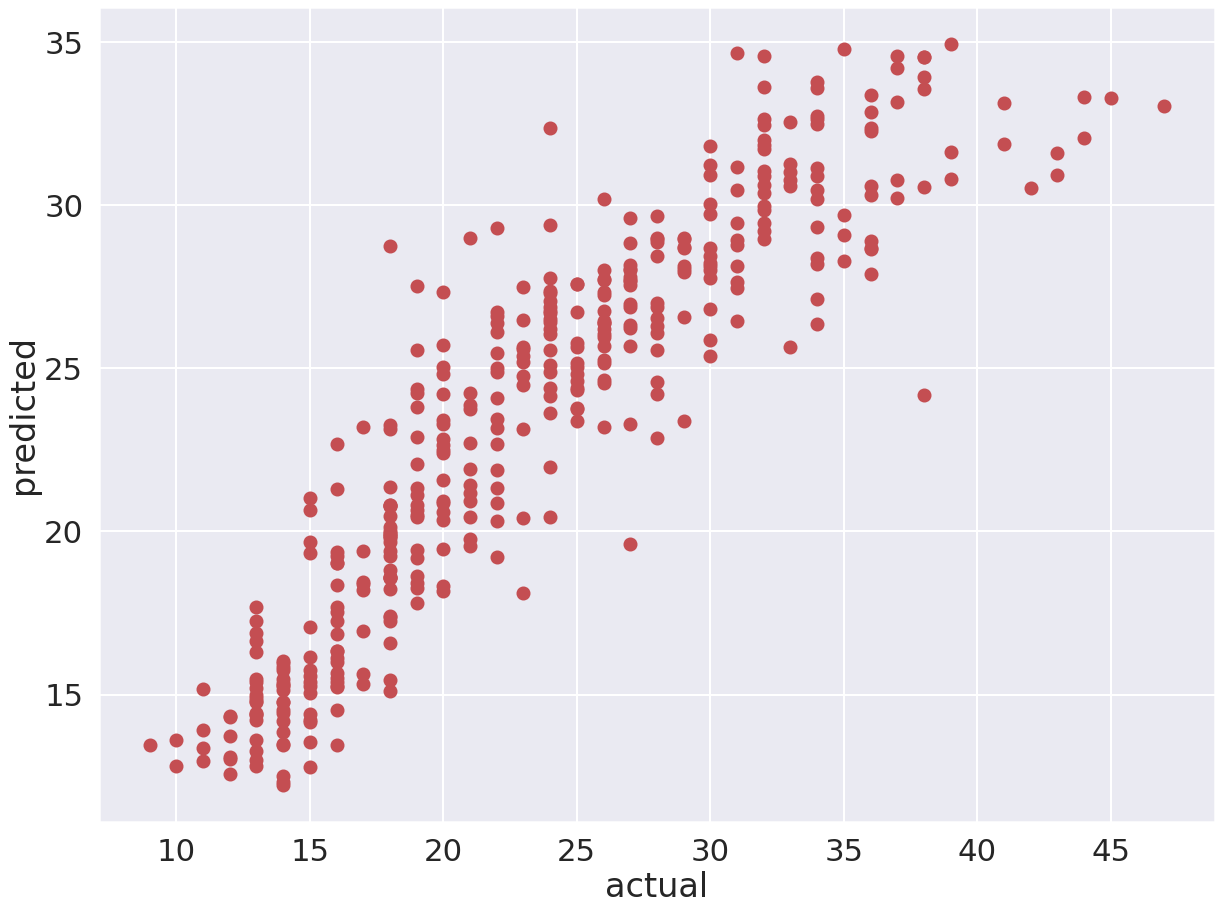

In [23]:
fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y, reg.predict(X), c='r')
ax.set_xlabel('actual')
ax.set_ylabel('predicted')
#ax.set_title("Figure 1: Linear Polynomial with Gaussian Noise ($m = 3, b = 2, \sigma = 1$)\n")
plt.show()